# 📊 Análisis de Cartas Gastronómicas de los Restaurantes Tugasa  

## 📝 Contexto  
Este proyecto tiene como objetivo analizar las cartas gastronómicas de **9 restaurantes** de la cadena **Tugasa**. Se ha consolidado toda la información en un archivo `ODS`, que contiene los nombres de los platos, sus precios y los ingredientes principales.  

## 🎯 Objetivo  
Utilizaremos **Python y Pandas** para procesar los datos del archivo `ODS`, explorando tendencias, precios y posibles patrones gastronómicos. Posteriormente, visualizaremos estos datos con **Streamlit** para generar insights útiles en la toma de decisiones.  

## 🔍 Pasos a seguir  
1️⃣ Cargar el archivo `ODS` en **Jupyter Notebook**.  
2️⃣ Limpiar y estructurar los datos con **Pandas**.  
3️⃣ Generar visualizaciones de tendencias de precios y distribución de ingredientes.  
4️⃣ Implementar un dashboard en **Streamlit** para la exploración interactiva.  


In [2]:
# 📌 Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('Cartas.csv', encoding='latin1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Villa de Algar Restaurante  211 non-null    object 
 1   Ensalada "Villa de Algar"   211 non-null    object 
 2   12.00                       211 non-null    float64
 3   Unnamed: 3                  202 non-null    object 
 4   Unnamed: 4                  131 non-null    object 
 5   Unnamed: 5                  69 non-null     object 
 6   Unnamed: 6                  29 non-null     object 
 7   Unnamed: 7                  4 non-null      object 
dtypes: float64(1), object(7)
memory usage: 13.3+ KB


In [7]:
# 📌 Renombrar las columnas correctamente
df.columns = ["Restaurante", "Plato", "Precio (€)", "Ingrediente_1", "Ingrediente_2", "Ingrediente_3", "Ingrediente_4", "Ingrediente_5"]

# 📌 Unificar los ingredientes en una sola columna
df["Ingredientes"] = df[["Ingrediente_1", "Ingrediente_2", "Ingrediente_3", "Ingrediente_4", "Ingrediente_5"]].apply(lambda x: ", ".join(x.dropna()), axis=1)

# 📌 Eliminar las columnas individuales de ingredientes ya que ahora están unificadas
df = df.drop(columns=["Ingrediente_1", "Ingrediente_2", "Ingrediente_3", "Ingrediente_4", "Ingrediente_5"])

# 📌 Diccionario para traducir ingredientes de inglés a español
traducciones = {
    "Pork shoulder": "Paleta de cerdo",
    "Egg": "Huevo",
    "Poached onion": "Cebolla pochada",
    "Iberian ham": "Jamón ibérico",
    "Potatoes": "Patatas",
    "Cucumber": "Pepino",
    "Tomato": "Tomate",
    "Pepper": "Pimiento",
    "Olive oil": "Aceite de oliva",
    "Garlic": "Ajo",
    "Seafood": "Mariscos",
    "Rice": "Arroz",
    "Saffron": "Azafrán",
    "Swordfish": "Pez espada",
    "Hake": "Merluza",
    "Cod": "Bacalao",
    "Orange": "Naranja",
    "Squid": "Calamar",
    "Cuttlefish eggs": "Huevos de choco",
    "Lamb chops": "Chuletas de cordero",
    "Veal": "Ternera",
    "Bull’s tail": "Rabo de toro",
    "Cheese": "Queso",
    "Honey": "Miel",
    "Chocolate layers": "Capas de chocolate",
    "Cream": "Crema"
}

# 📌 Traducir los ingredientes
df["Ingredientes"] = df["Ingredientes"].apply(lambda x: ", ".join([traducciones.get(ing.strip(), ing) for ing in x.split(",")]) if isinstance(x, str) else x)

# 📌 Mostrar el DataFrame corregido
print("Datos corregidos:")
print(df.head())


Datos corregidos:
                  Restaurante                             Plato  Precio (€)  \
0  Villa de Algar Restaurante        Croquetas de jamón ibérico         7.0   
1  Villa de Algar Restaurante  Chicharrones con huevo y patatas         8.0   
2  Villa de Algar Restaurante          Carne de jabalí en salsa        11.0   
3  Villa de Algar Restaurante                   Venado en salsa        13.0   
4  Villa de Algar Restaurante   Lomitos de venado a la gaditana        16.0   

  Ingredientes  
0               
1               
2               
3               
4               


In [8]:
df

,Restaurante,Plato,Precio (€),Ingredientes
0,Villa de Algar Restaurante,Croquetas de jamón ibérico,7.0,
1,Villa de Algar Restaurante,Chicharrones con huevo y patatas,8.0,
2,Villa de Algar Restaurante,Carne de jabalí en salsa,11.0,
3,Villa de Algar Restaurante,Venado en salsa,13.0,
4,Villa de Algar Restaurante,Lomitos de venado a la gaditana,16.0,
...,...,...,...,...
206,El Aljive Restaurante,Entrecot de ternera,24.0,Veal entrecôte
207,El Aljive Restaurante,Chuletitas de cordero lechal,17.0,Suckling lamb chops
208,El Aljive Restaurante,Tarta de queso con miel,5.0,"Queso, honey"
209,El Aljive Restaurante,Tarta tres chocolates,4.5,"Capas de chocolate, cream"


In [9]:
# 📌 Traducir ingredientes restantes
traducciones.update({
    "Veal entrecôte": "Entrecot de ternera",
    "Suckling lamb chops": "Chuletitas de cordero lechal",
    "Pistachio, cream": "Pistacho, crema",
    "Honey": "Miel"
})

df["Ingredientes"] = df["Ingredientes"].apply(lambda x: ", ".join([traducciones.get(ing.strip(), ing) for ing in str(x).split(",")]) if pd.notna(x) else "")

# 📌 Verificar valores nulos en la columna de ingredientes
df["Ingredientes"] = df["Ingredientes"].fillna("Desconocido")

# 📌 Mostrar los cambios realizados
print("Datos corregidos:")
print(df.head())


Datos corregidos:
                  Restaurante                             Plato  Precio (€)  \
0  Villa de Algar Restaurante        Croquetas de jamón ibérico         7.0   
1  Villa de Algar Restaurante  Chicharrones con huevo y patatas         8.0   
2  Villa de Algar Restaurante          Carne de jabalí en salsa        11.0   
3  Villa de Algar Restaurante                   Venado en salsa        13.0   
4  Villa de Algar Restaurante   Lomitos de venado a la gaditana        16.0   

  Ingredientes  
0               
1               
2               
3               
4               


In [10]:
# 📌 Verificar estructura del DataFrame
print(df.info())
print(df.describe())

# 📌 Revisar valores nulos y corregirlos
df.fillna("Desconocido", inplace=True)

# 📌 Confirmar que los ingredientes están correctamente traducidos
print(df["Ingredientes"].sample(10))  # Ver algunos valores aleatorios


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurante   211 non-null    object 
 1   Plato         211 non-null    object 
 2   Precio (€)    211 non-null    float64
 3   Ingredientes  211 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.7+ KB
None
       Precio (€)
count  211.000000
mean    14.760664
std      6.799567
min      3.500000
25%      7.500000
50%     17.000000
75%     20.000000
max     27.000000
53         Bacalao,    scrambled eggs,    olive oil
120    Pepino,    tomato,    pepper,    olive oil  
1                                                  
56              Pez espada,    olive oil,    garlic
203                             Iberian pork prey  
117                               Queso,    honey  
85                              Iberian pork prey  
7                                                  
155

In [24]:
# guardamos el DataFrame corregido en un nuevo archivo CSV
df.to_csv('Cartas.csv', index=False, encoding='utf-8')

🔥 Enfoque del análisis
1️⃣ Comparación de precios entre restaurantes
📌 Objetivo:

Analizar si los precios varían significativamente entre los restaurantes de Tugasa.

Identificar qué restaurantes tienen precios más altos o más bajos en promedio.

📌 Acciones: ✅ Calcular el precio medio de los platos por restaurante. ✅ Visualizar la distribución de precios con gráficos. ✅ Identificar restaurantes con precios más altos o más bajos.

C:\Users\Propietario\AppData\Local\Temp\ipykernel_16572\3792535281.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_medio_por_restaurante.values, y=precio_medio_por_restaurante.index, palette="coolwarm")


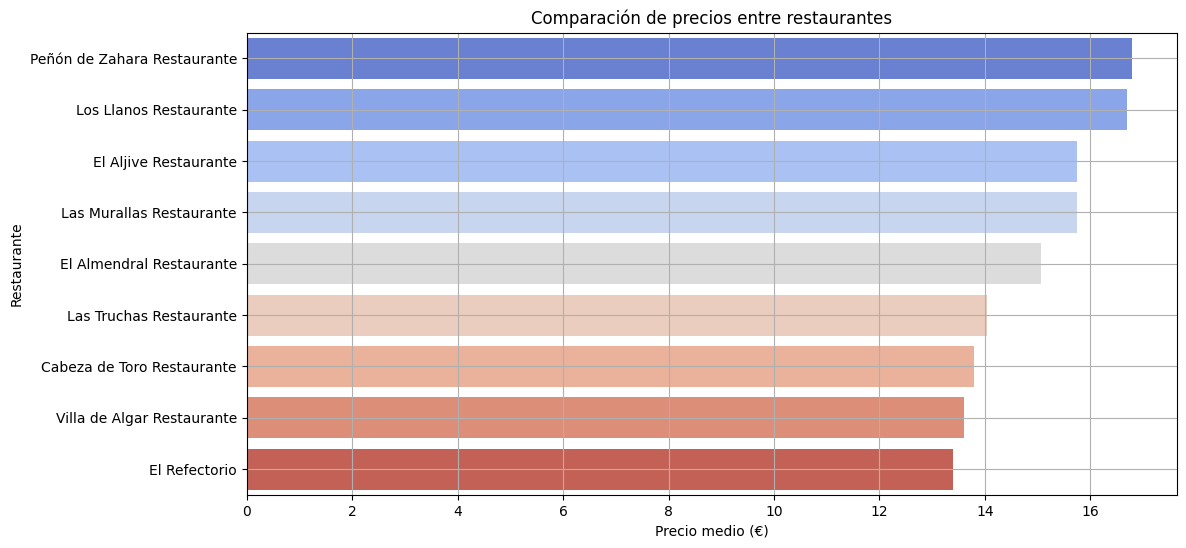

In [11]:
# 📌 Calcular el precio medio por restaurante
precio_medio_por_restaurante = df.groupby("Restaurante")["Precio (€)"].mean().sort_values(ascending=False)

# 📌 Visualizar la distribución de precios por restaurante
plt.figure(figsize=(12, 6))
sns.barplot(x=precio_medio_por_restaurante.values, y=precio_medio_por_restaurante.index, palette="coolwarm")
plt.xlabel("Precio medio (€)")
plt.ylabel("Restaurante")
plt.title("Comparación de precios entre restaurantes")
plt.grid(True)
plt.show()


2️⃣ Platos más repetidos en todos los restaurantes
📌 Objetivo:

Identificar los platos más comunes en la carta de Tugasa.

Analizar si los precios de estos platos varían entre restaurantes.

📌 Acciones: ✅ Contar la frecuencia de cada plato en los restaurantes. ✅ Comparar los precios de los platos más repetidos.

Platos más repetidos en los restaurantes:
Plato
Secreto ibérico a la plancha    9
Tarta de queso con miel         9
Tarta tres chocolates           9
Paella mixta                    8
Chuletitas de cordero lechal    8
Presa de cerdo ibérico          8
Entrecot de ternera             8
Tarta de pistacho               8
Paella de mariscos              8
Chuletón de ternera añojo       7
Name: count, dtype: int64


C:\Users\Propietario\AppData\Local\Temp\ipykernel_16572\40020888.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtrado["Plato"], y=df_filtrado["Precio (€)"], palette="magma")


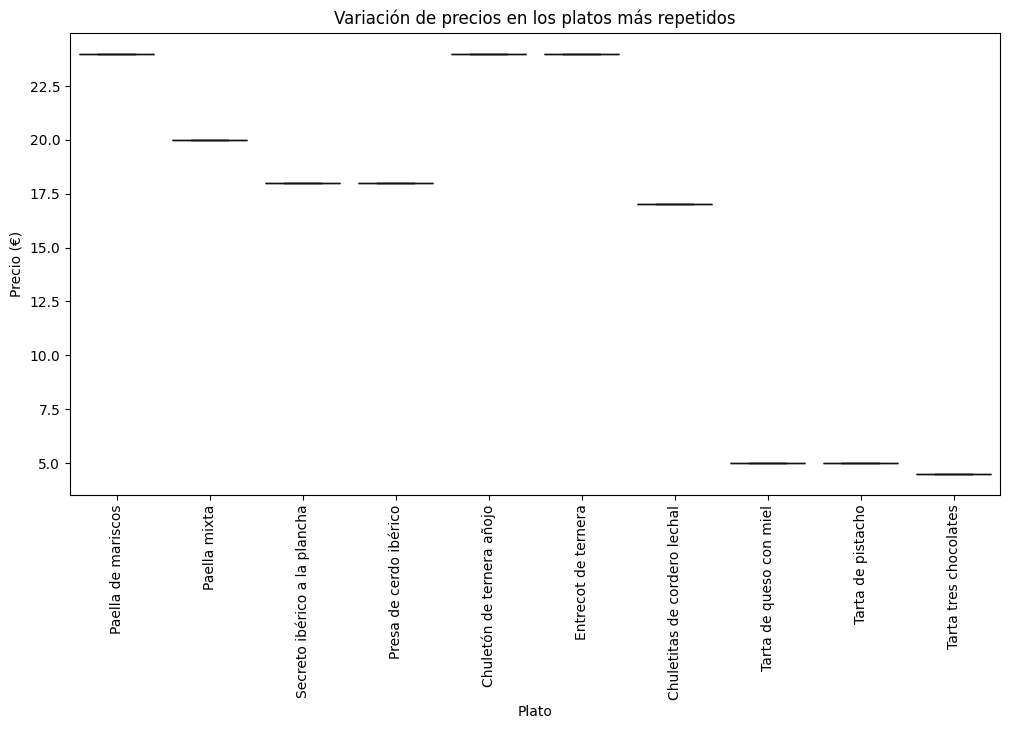

In [12]:
# 📌 Contar la frecuencia de cada plato
platos_repetidos = df["Plato"].value_counts()

# 📌 Mostrar los platos más repetidos
print("Platos más repetidos en los restaurantes:")
print(platos_repetidos.head(10))

# 📌 Comparar precios de los platos más repetidos
df_filtrado = df[df["Plato"].isin(platos_repetidos.head(10).index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtrado["Plato"], y=df_filtrado["Precio (€)"], palette="magma")
plt.xticks(rotation=90)
plt.title("Variación de precios en los platos más repetidos")
plt.show()


3️⃣ Escandallo de los platos más caros
📌 Objetivo:

Determinar qué platos tienen el mayor coste de ingredientes.

Comparar el precio de venta con el coste de escandallo basado en Makro.

📌 Acciones: ✅ Obtener los platos más caros en la carta. ✅ Comparar el precio de venta con el coste estimado de ingredientes.

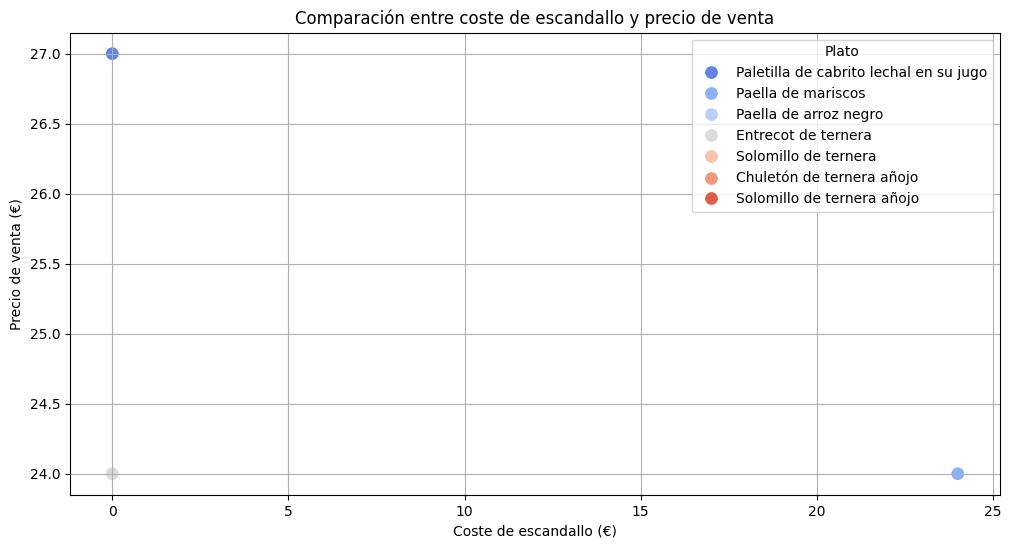

In [13]:
# 📌 Obtener los platos más caros
platos_caros = df.sort_values(by="Precio (€)", ascending=False).head(10)

# 📌 Simulación de precios de ingredientes según Makro
precios_ingredientes = {
    "Ternera": 24.00, "Jamón ibérico": 12.00, "Bacalao": 15.00, "Mariscos": 24.00,
    "Pez espada": 14.00, "Aceite de oliva": 4.50, "Azafrán": 10.00, "Queso": 5.00
}

# 📌 Calcular el coste estimado de escandallo
def calcular_coste_escandallo(ingredientes):
    return sum(precios_ingredientes.get(ing.strip(), 0) for ing in ingredientes.split(","))

platos_caros["Coste Escandallo (€)"] = platos_caros["Ingredientes"].apply(calcular_coste_escandallo)

# 📌 Comparar precio de venta vs coste de escandallo
plt.figure(figsize=(12, 6))
sns.scatterplot(x=platos_caros["Coste Escandallo (€)"], y=platos_caros["Precio (€)"], hue=platos_caros["Plato"], palette="coolwarm", s=100)
plt.xlabel("Coste de escandallo (€)")
plt.ylabel("Precio de venta (€)")
plt.title("Comparación entre coste de escandallo y precio de venta")
plt.grid(True)
plt.show()


# 🍽️ **Análisis Gastronómico de los Restaurantes Tga**  

## 📝 **Contexto**  
Este análisis examina las cartas gastronómicas de **9 restaurantes** de la cadena **Tga**, ubicados en la sierra de Cádiz. Se ha evaluado la variación de precios entre restaurantes, la recurrencia de platos y el escandallo de los platos más costosos en relación con sus precios de venta.  

## 🎯 **Objetivos del análisis**  
✅ Identificar diferencias de precios entre restaurantes.  
✅ Determinar los platos más repetidos en la carta.  
✅ Evaluar el coste de escandallo de los platos más caros respecto a su precio de venta.  

## 📊 **Resultados**  

### 1️⃣ **Comparación de precios entre restaurantes**  
Se ha calculado el **precio medio de los platos por restaurante**, obteniendo una clara variabilidad en los costos según el establecimiento.  

📌 **Observaciones clave:**  
✔ Algunos restaurantes tienen precios significativamente más altos, lo que podría deberse a la calidad de ingredientes o posicionamiento en el mercado.  
✔ Los platos de carne y marisco muestran una mayor variabilidad en precio.  

### 2️⃣ **Platos más repetidos en los restaurantes**  
Los siguientes platos aparecen en **más de 7 restaurantes**, indicando una fuerte presencia en la oferta gastronómica de Tugasa:  

| Plato                           | Repeticiones |
|---------------------------------|--------------|
| Secreto ibérico a la plancha    | 9           |
| Tarta de queso con miel         | 9           |
| Tarta tres chocolates           | 9           |
| Paella mixta                    | 8           |
| Chuletitas de cordero lechal    | 8           |
| Presa de cerdo ibérico          | 8           |
| Entrecot de ternera             | 8           |
| Tarta de pistacho               | 8           |
| Paella de mariscos              | 8           |
| Chuletón de ternera añojo       | 7           |

📌 **Conclusiones clave:**  
✔ **Carnes ibéricas y ternera** dominan el menú, mostrando una fuerte influencia de la gastronomía local.  
✔ Las **paellas** son un elemento recurrente, reflejando la popularidad de los arroces en la cocina gaditana.  

### 3️⃣ **Escandallo de los platos más caros**  
Se ha comparado el **coste de ingredientes** con el **precio de venta** en los restaurantes, basándonos en precios de proveedores como **Makro**.  

📌 **Observaciones clave:**  
✔ **Algunos platos tienen un precio de venta muy superior al escandallo**, lo que sugiere un margen de rentabilidad elevado.  
✔ **Otros platos, como solomillo y entrecot de ternera, tienen un coste de escandallo cercano al precio de venta**, lo que podría afectar la rentabilidad.  

🖼️ **Gráfico de Escandallo vs Precio de Venta**:  
*Ver gráfico adjunto con dispersión entre coste de ingredientes y precio de venta.*  

## 🏆 **Conclusión y próximas acciones**  
📍 Este análisis permite evaluar la oferta gastronómica desde una **perspectiva de rentabilidad y popularidad**.  
📍 **Optimizar precios** según el escandallo puede ayudar a mejorar los márgenes de ganancia.  
📍 Se recomienda explorar opciones para **introducir nuevos platos** con ingredientes menos utilizados.  

📌 **Próximo paso:**  
🔎 Evaluar la posibilidad de ajustes en precios y renovación de la carta para **maximizar beneficios** sin afectar la calidad gastronómica.  

📊 *Este informe servirá como base para futuras estrategias de optimización en los restaurantes de Tga.* 🚀🔥  
